## Menyesuaikan Kontras dalam Gambar

Kontras adalah perbedaan dalam pencahayaan atau warna yang membuat objek dalam gambar dapat dibedakan. Dengan kata lain, kontras adalah pemisahan antara area yang paling gelap dan paling terang pada gambar. 

Meningkatkan kontras pada gambar dapat membuatnya terlihat lebih tajam, meskipun terlalu banyak kontras dapat membuat gambar terlihat kasar. Mengurangi kontras dapat membuat gambar terlihat lebih lembut, tetapi jika Anda mengurangi kontras terlalu banyak, gambar bisa terlihat pudar.

Dalam pemrosesan gambar digital, penyesuaian kontras dapat dicapai melalui proses yang disebut peregangan kontras atau normalisasi. Proses ini meluaskan atau memperkecil kisaran nilai intensitas piksel. Bentuk peregangan kontras yang paling sederhana adalah peregangan linier, di mana kisaran intensitas piksel diskalakan untuk menjangkau seluruh kisaran output yang diinginkan.

Rumus untuk peregangan kontras adalah:
`new_pixel_value = (old_pixel_value - min) * ((new_max - new_min) / (max - min)) + new_min`

Where:
- `old_pixel_value` adalah nilai asli piksel.
- `min` and `max` adalah nilai piksel minimum dan maksimum pada gambar asli.
- `new_min` and `new_max` adalah nilai piksel minimum dan maksimum yang diinginkan untuk gambar keluaran.

Operasi ini dilakukan pada setiap piksel dalam gambar, secara efektif menyesuaikan kontras gambar.

Yang penting untuk diperhatikan, bahwa penyesuaian kontras dapat menyebabkan hilangnya detail pada gambar, khususnya jika kontrasnya ditingkatkan terlalu banyak. Hal ini karena peningkatan kontras dapat menyebabkan nilai piksel terpotong, yang berarti, bahwa semua detail di dalam area tersebut akan hilang.



In [2]:
import numpy as np
import cv2

def adjust_contrast(image, new_min, new_max):
    # mendapatkan nilai piksel minimum dan maksimum gambar
    min_val = np.min(image)
    max_val = np.max(image)
    
    # Menyesuaikan kontras gambar
    adjusted_image = (image - min_val) * ((new_max - new_min) / (max_val - min_val)) + new_min
    
    # Clip nilai piksel untuk memastikan nilai piksel berada dalam kisaran yang valid
    adjusted_image = np.clip(adjusted_image, 0, 255)
    
    # Mengonversi nilai piksel menjadi bilangan bulat
    adjusted_image = adjusted_image.astype(np.uint8)
    
    return adjusted_image

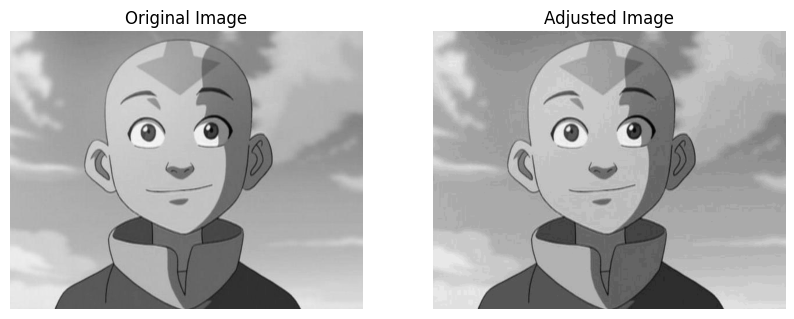

In [3]:
import matplotlib.pyplot as plt

# Load gambar
image = cv2.imread('../FILE/aang.jpg', cv2.IMREAD_GRAYSCALE)

# Menyesuaikan kontras gambar
new_image = adjust_contrast(image, 222, 255)

# Menampilkan gambar
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray')
plt.title('Adjusted Image')
plt.axis('off')

plt.show()